In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import time
import numpy as np
from datetime import datetime
import yfinance as yf
import os
import glob
import regex as re
import csv
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
PROMISING if you restrict market cap to 200 mil to 3 bil

In [78]:
def remove_none_types(mydf):
    if mydf.isnull().values.any():
        return False
    else:
        return True

X_data = []
Y_data = []

sectors = ["automobiles", "banks"]
for sector in sectors:
    filelist = os.listdir("sectors/"+sector)
    try:
        filelist.remove('.DS_Store')
    except:
        pass

    for stock in filelist:
        sector_files = glob.glob('sectors/'+str(sector)+'/'+str(stock)+'/'+str(stock)+'20*[0-9]**[0-9]*[1-4].*')
        sector_files.sort(reverse=True)

        testpath = sector_files[0]
        testdata_from_csv = pd.read_csv(testpath)
        try:
            market_cap = float(testdata_from_csv.iloc[[-1]].values[0][0])
            if (market_cap > 200000000) and (market_cap < 3000000000):
                number_to_loop = len(sector_files)
                if number_to_loop%2 != 0:
                    number_to_loop = number_to_loop-(number_to_loop%2) 
                for i in range(0, number_to_loop+1, 2): # for every .csv path of that stock
                    path = sector_files[i]
                    path2 = sector_files[i+1]
                    data_from_csv = pd.read_csv(path)
                    data_from_csv2 = pd.read_csv(path2)
                    Checks_None = remove_none_types(data_from_csv)
                    Checks_None2 = remove_none_types(data_from_csv2)
                    if (Checks_None == True) and (Checks_None2 == True):
                        single_X_data = (np.array((data_from_csv[3:73].astype(float))).flatten()) 
                        single_X_data2 = (np.array((data_from_csv2[3:73].astype(float))).flatten()) 
                        if ((single_X_data.shape[0]) == 70) and ((single_X_data2.shape[0]) == 70):
                            X_data.append(single_X_data)
                            X_data.append(single_X_data2)
                            single_Y_data = np.array(data_from_csv[85:95].astype(float)).flatten()
                            Y_data.append(single_Y_data)
        except:
            pass


                

#[
#   [#AAPL
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ],
#   [#MSFT
#       [ [earnings call 1], [earnings call 2], [earnings call 3]
#   ]
#
# ]

X_data = X_data[::-1]
Y_data = Y_data[::-1]

ORI_X_data = np.array(X_data)

ORI_Y_data = np.array(Y_data)
Y_data = ORI_Y_data[:,4]



In [82]:
scaler = StandardScaler()
X_data = scaler.fit_transform(ORI_X_data)
X_data

array([[-0.30984509, -0.65643891, -0.83690241, ...,  0.40134169,
         0.54743862, -0.1960706 ],
       [ 0.0618992 , -1.25780695, -0.90391184, ...,  2.91533501,
         2.87556255, -0.1960706 ],
       [-0.03196409, -0.48313319, -0.87760443, ...,  0.62033747,
         0.54743862, -0.1960706 ],
       ...,
       [-0.01438255,  0.24776448,  0.55271784, ..., -0.52766475,
        -0.61662335, -0.1960706 ],
       [ 0.01935402,  0.36698688,  0.61798521, ..., -0.52766475,
        -0.61662335, -0.1960706 ],
       [-0.04665698,  0.84386963,  0.99944613, ..., -0.52766475,
        -0.61662335, -0.1960706 ]])

In [83]:
X_data = ORI_X_data.reshape(-1,2,70)

In [26]:
Y_data = ORI_Y_data.reshape(-1,10)
Y_data

array([[ 0.18715475,  0.11144807, -0.00389906, ..., -0.02821215,
         0.05969993,  0.16895602],
       [-0.11340496,  0.01913649, -0.14375942, ..., -0.13056379,
        -0.16138605,  0.00708335],
       [-0.05403898, -0.07270197, -0.09632308, ..., -0.09712789,
        -0.09952134, -0.23015699],
       ...,
       [ 0.01385902,  0.19115882,  0.20757352, ...,  0.13683897,
         0.13506088,  0.12234283],
       [-0.03066438,  0.08796117,  0.02309547, ...,  0.02344407,
         0.04181204,  0.12850102],
       [ 0.13421676,  0.07921935, -0.03353274, ..., -0.05833994,
        -0.11548433, -0.28691778]])

In [84]:
Y_data

array([ 7.73931950e-02,  1.68141254e-01,  9.03223184e-02,  1.82663852e-02,
        3.05399045e-01,  8.03513864e-03, -1.33752441e-02,  2.29745772e-01,
        2.19622434e-01,  2.96111448e-03,  5.73083461e-02, -3.29386594e-03,
        5.44705583e-02,  4.77577275e-02,  1.21074068e-01,  6.82754230e-02,
       -7.98986485e-02, -9.10300068e-02,  1.35227509e-01,  6.99117139e-03,
        1.89429053e-02, -1.46807755e-02,  1.27485535e-01,  1.81487083e-01,
       -1.39686538e-02, -8.05363773e-02, -2.38567606e-03,  1.31466940e-01,
        2.77004805e-04, -4.90691885e-01, -1.32316319e-01, -7.03381012e-04,
       -7.05690504e-02, -9.38762995e-02, -1.12580876e-02,  1.17091604e-02,
        2.02933893e-01, -4.86773490e-02,  9.64647983e-02,  1.23228097e-01,
       -5.73468931e-02, -6.12644413e-02,  1.09842678e-01,  2.90196848e-01,
       -8.66973757e-02, -2.74130158e-02, -5.26055319e-02, -1.49040529e-02,
       -2.94657991e-02,  5.72615036e-02,  3.93218899e-02, -7.70252787e-02,
        4.58598689e-02,  

In [21]:
X_data[0:2]

array([[[ 2.07830641e-02,  1.62439030e+00,  1.21727225e+00,
         -1.00284436e+00, -1.48273103e+00, -4.82568195e-01,
         -4.53502998e-01,  2.92317989e-01, -1.06523449e+00,
          2.21333449e-02, -6.65090667e-01, -6.73628990e-01,
         -7.84313054e-01,  1.91123664e+00,  1.48395634e+00,
         -1.13874095e+00, -2.38747757e+00,  4.49731126e-01,
         -4.20903495e-01, -1.03444878e+00, -3.43972402e-01,
          1.47457322e+00,  4.90356486e-01, -1.08362001e+00,
          9.93145809e-02,  1.87486338e+00,  9.53873381e-01,
          9.47129143e-01,  9.63845249e-01, -2.05098904e-01,
         -1.11194846e+00, -1.07057252e-01, -5.97775859e-01,
         -8.50581799e-01, -9.69638618e-01, -1.20989927e+00,
          6.53907088e-01,  1.21743176e+00,  1.34350893e+00,
         -1.82044844e-01, -4.54738420e-01, -9.11332198e-02,
          9.43348604e-01,  1.02920643e+00,  1.07605188e+00,
         -2.98574052e-01,  6.53643868e-01,  5.13092478e-01,
         -5.75857189e-01,  6.70026021e-0

In [85]:
X_data.shape

(411, 2, 70)

In [86]:
Y_data.shape


(411,)

In [79]:
Y_dataCOPY = Y_data.copy()
df = pd.DataFrame(Y_dataCOPY)


# df[0] = np.where(df[0] < -0.4, -2,
#     np.where((df[0] >= -0.4) & (df[0] < -0.07), -1,
#     np.where((df[0] >= -0.07) & (df[0] <= 0.07), 0,
#     np.where((df[0] > 0.07) & (df[0] <= 0.4), 1, 2))))

df[0] = np.where(df[0] < 0.1, 0, 1)

    
Y_data_update = df.to_numpy()

print(Y_data_update.shape)


(411, 1)


In [19]:
Y_data_update

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data_update, test_size=0.33, random_state=65)
Y_train.shape

(275, 1)

In [296]:
# model2 = model

In [88]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, TimeDistributed
from keras.optimizers import Adam
# Generate toy data for demonstration purposes
timesteps = 2
input_dim = 70

model = Sequential()
model.add(LSTM(64, input_shape=(timesteps,input_dim), return_sequences=True))
model.add(Dropout(0.5)),
model.add(LSTM(32, return_sequences=False)),
model.add(Dropout(0.5)),
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(lr=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.33)


Epoch 1/50


/Users/victor/miniforge3/envs/NLP_env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-02-08 10:50:27.535728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:27.870293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:28.002711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:28.303903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:28.491332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabl

6/6 [==============================] - ETA: 0s - loss: 0.6354 - accuracy: 0.6902

2023-02-08 10:50:29.547330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:29.658386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:29.726441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 4s 276ms/step - loss: 0.6354 - accuracy: 0.6902 - val_loss: 0.6125 - val_accuracy: 0.7033
Epoch 2/50
6/6 [==============================] - 0s 63ms/step - loss: 0.6173 - accuracy: 0.7011 - val_loss: 0.6074 - val_accuracy: 0.7033
Epoch 3/50
6/6 [==============================] - 0s 52ms/step - loss: 0.6342 - accuracy: 0.7065 - val_loss: 0.6066 - val_accuracy: 0.7033
Epoch 4/50
6/6 [==============================] - 0s 37ms/step - loss: 0.6371 - accuracy: 0.7065 - val_loss: 0.6069 - val_accuracy: 0.7033
Epoch 5/50
6/6 [==============================] - 0s 29ms/step - loss: 0.6180 - accuracy: 0.7065 - val_loss: 0.6071 - val_accuracy: 0.7033
Epoch 6/50
6/6 [==============================] - 0s 35ms/step - loss: 0.6184 - accuracy: 0.7065 - val_loss: 0.6076 - val_accuracy: 0.7033
Epoch 7/50
6/6 [==============================] - 0s 27ms/step - loss: 0.6075 - accuracy: 0.7065 - val_loss: 0.6081 - val_accuracy: 0.7033
Epoch 8/50
6/6 [=====================

2023-02-08 10:50:41.013377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:41.107841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-08 10:50:41.195165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 59ms/step
MSE: 0.21
R2: -0.00


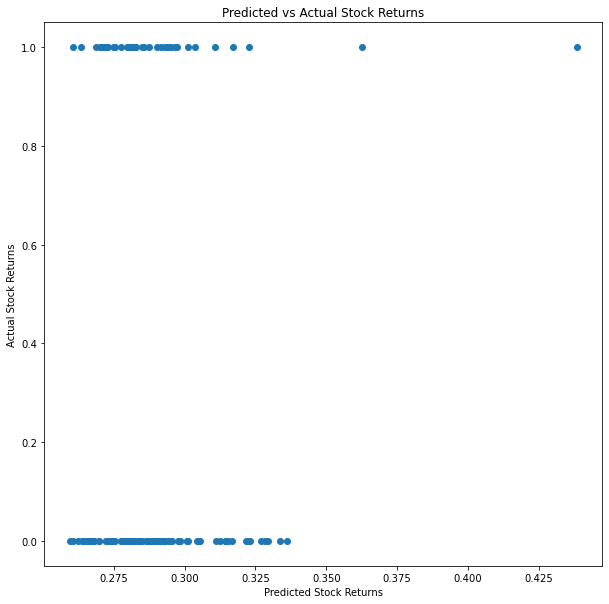

In [89]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

plt.figure(figsize=(10,10))
plt.scatter(Y_pred, Y_test)
plt.ylabel("Actual Stock Returns")
plt.xlabel("Predicted Stock Returns")
plt.title("Predicted vs Actual Stock Returns")
plt.show()

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [381]:
Y_pred[0:5]

array([[0.1758499 , 0.1115374 , 0.11806431, 0.35915485, 0.23539351],
       [0.14748642, 0.32831475, 0.3417308 , 0.0678051 , 0.114663  ],
       [0.17585044, 0.11153541, 0.11806197, 0.35916072, 0.23539153],
       [0.1758501 , 0.11153518, 0.11806197, 0.35916072, 0.23539197],
       [0.17584987, 0.11153525, 0.11806183, 0.35916096, 0.23539214]],
      dtype=float32)

In [382]:
Y_test[0:5]

array([[-0.08045977, -0.13218381, -0.09578568, -0.13601514, -0.58045981],
       [-0.03092562, -0.00497413, -0.0341696 , -0.020545  , -0.00700478],
       [-0.0061308 , -0.01426791, -0.08781975, -0.07338441, -0.05344972],
       [ 0.06046141,  0.05724236,  0.05042499, -0.08421559, -0.08364814],
       [-0.03031538,  0.02369234,  0.11084151,  0.09242959,  0.06174332]])